# Substitution Bug

I believe I have found a bug in `sympy` that affects our ability to implement full code generation for a finite element formulation.  The initial PDE and the weak form, obtained by performing integration by parts, require that we use the `Derivative` class for initial description and subsequent manipulation, but we have to substitute a new function for these derivative objects.  In the example that follows, I will try to make the following substitution:

$$
\frac{d}{dx}\phi_i(x) \leftarrow \phi_{i,x}(x),
$$

The reason to make this substitution is to help facilitate code generation, where we assume the derivatives of the basis functions are stored as arrays.

We start with a simple expression involving a derivative:

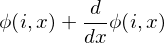

In [1]:
from sympy import *
init_printing()
i = Idx('i')
x = Symbol('x')
phi = Function('phi')(i,x)
expr = Derivative(phi,x) + phi
expr

We now perform a substitution to replace the derivative with a function:

In [2]:
phi_x = Function('phi_x')(i,x)
expr.subs(Derivative(phi,x), phi_x)

This substitution worked as expected.  Now we put this simple expression inside a summation, and try to apply the substitution again:

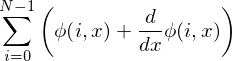

In [3]:
N = Symbol('N', integer=True)
expr = summation(Derivative(phi,x) + phi, (i,0,N-1))
expr

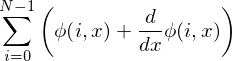

In [4]:
expr.subs(Derivative(phi,x), phi_x)

Clearly, in this case, the second substitution has no effect.  I thought it might have something to do with $\phi(i,x)$, which might need to be a `IndexedBase` object to "work" properly within a summation (rather than a `Function` object).  But I see the same behavior with integrals as summations, and integrals do not depend on indexes.

I have posted a question about this, using the above example, on __[Stack Overflow](https://stackoverflow.com/questions/53751640/sympy-expr-subs-method-does-not-work-within-a-sum)__.  If I don't get a response with a viable workaround, I will post a bug to the SymPy project.